In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [63]:
# Read the data (replace 'data.csv' with your actual file name)
df = pd.read_csv('./data/CarPrice_Assignment.csv')



In [64]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [66]:
df = df.drop(columns=['car_ID'])

In [67]:
X = df.drop(columns=['price'])
y = df['price']

In [68]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [69]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])
X_encoded.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [70]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 199), (41, 199), (164,), (41,))

In [71]:
# Initialize and train an XGBoost regressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [72]:
y_test
y_pred_test

array([23988.186 , 18114.748 ,  9572.622 , 13922.423 , 20396.39  ,
        7075.5537,  7395.64  ,  7835.426 , 12561.409 ,  7905.653 ,
       16072.55  ,  8087.932 , 15198.995 , 11739.574 , 23567.52  ,
        6570.056 ,  6438.1953, 11956.27  ,  9759.602 , 11831.254 ,
       10209.735 , 19497.627 ,  6993.4697,  5510.154 ,  6802.5063,
       23988.186 , 10982.666 , 17151.518 ,  7431.1475, 17136.826 ,
       22907.31  ,  5615.742 ,  8211.027 , 19704.883 ,  8064.3823,
       22983.893 , 13700.347 , 13109.145 ,  7208.987 , 11539.632 ,
        9110.847 ], dtype=float32)

In [78]:
y_test.dtypes

dtype('float64')

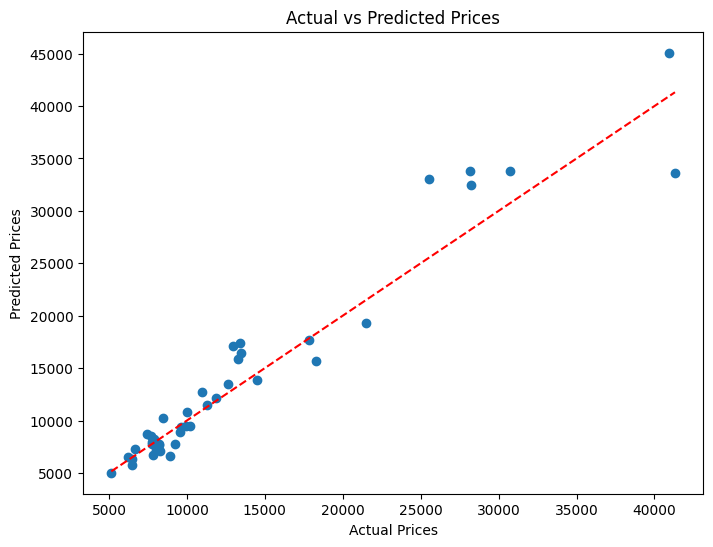

In [74]:
# Plot actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()





In [75]:
# Columns comparing y_test and y_pred side byside
# Create a DataFrame to compare y_test and y_pred side by side
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)


        Actual     Predicted
15   30760.000  33806.292969
9    17859.167  17685.816406
100   9549.000   8916.134766
132  11850.000  12183.380859
68   28248.000  32457.009766
95    7799.000   6746.029785
159   7788.000   7767.438965
162   9258.000   7719.928711
147  10198.000   9467.460938
182   7775.000   7973.512207
191  13295.000  15886.318359
164   8238.000   7648.218262
65   18280.000  15671.433594
175   9988.000  10856.805664
73   40960.000  45085.914062
152   6488.000   6334.215332
18    5151.000   5018.519531
82   12629.000  13501.132812
86    8189.000   7740.988770
143   9960.000   9488.073242
60    8495.000  10281.837891
101  13499.000  16418.158203
98    8249.000   7068.601074
30    6479.000   5756.736328
25    6692.000   7287.723633
16   41315.000  33564.621094
168   9639.000   9383.266602
195  13415.000  17410.505859
97    7999.000   7203.628906
194  12940.000  17143.974609
67   25552.000  33062.222656
120   6229.000   6550.493164
154   7898.000   8246.791016
202  21485.000